In [77]:
import numpy as np
import pandas as pd

In [78]:
crop = pd.read_csv("cfg ds.csv")
crop.head()

,soil,temperature,humidity,rainfall,label
0,1,76,77,77,banana
1,1,76,73,75,banana
2,3,70,75,77,banana
3,3,74,74,80,banana
4,3,78,77,76,banana


In [79]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   soil         2000 non-null   int64 
 1   temperature  2000 non-null   int64 
 2   humidity     2000 non-null   int64 
 3   rainfall     2000 non-null   int64 
 4   label        2000 non-null   object
dtypes: int64(4), object(1)
memory usage: 78.2+ KB


In [80]:
crop.isnull().sum()

soil           0
temperature    0
humidity       0
rainfall       0
label          0
dtype: int64

In [81]:
crop.duplicated().sum()

145

In [82]:
corr = crop.corr()
corr

,soil,temperature,humidity,rainfall
soil,1.000000,0.035449,0.034825,0.036228
temperature,0.035449,1.000000,0.979937,0.980632
humidity,0.034825,0.979937,1.000000,0.978726
rainfall,0.036228,0.980632,0.978726,1.000000


<AxesSubplot:>

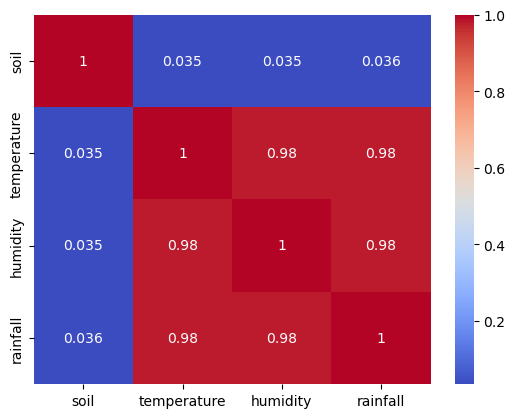

In [83]:
import seaborn as sns
sns.heatmap(corr,annot=True, cbar=True, cmap='coolwarm')

In [85]:
crop_dict = {
#     'coconut': 8,
    'orange': 6,
#     'apple': 10,
#     'muskmelon': 9,
    'watermelon': 4,
    'grapes': 3,
    'mango': 2,
    'banana': 1,
#     'pomegranate': 5,
}
crop['crop_num'] = crop['label'].map(crop_dict)

In [86]:
crop['crop_num'].value_counts()

1    400
6    400
2    400
3    400
4    400
Name: crop_num, dtype: int64

In [87]:
crop.drop('label', axis=1,inplace=True)
crop.head()

,soil,temperature,humidity,rainfall,crop_num
0,1,76,77,77,1
1,1,76,73,75,1
2,3,70,75,77,1
3,3,74,74,80,1
4,3,78,77,76,1


In [88]:
X = crop.drop('crop_num', axis=1)
y = crop['crop_num']

In [89]:
X.shape

(2000, 4)

In [90]:
y.shape

(2000,)

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
X_train.shape

(1600, 4)

In [94]:
X_test.shape

(400, 4)

In [95]:
X_train

,soil,temperature,humidity,rainfall
968,3,48,49,35
240,1,75,78,73
819,1,50,42,41
692,3,19,17,19
420,1,11,24,15
...,...,...,...,...
1130,1,48,36,48
1294,1,51,57,58
860,1,47,50,43
1459,1,50,60,50


In [96]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

ms.fit(X_train)
X_train= ms.transform(X_train)
X_test= ms.transform(X_test)

In [97]:
X_train

array([[1.        , 0.42222222, 0.43333333, 0.27777778],
       [0.        , 0.72222222, 0.75555556, 0.7       ],
       [0.        , 0.44444444, 0.35555556, 0.34444444],
       ...,
       [0.        , 0.41111111, 0.44444444, 0.36666667],
       [0.        , 0.44444444, 0.55555556, 0.44444444],
       [0.        , 0.34444444, 0.33333333, 0.41111111]])

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)
X_train= sc.transform(X_train)
X_test= sc.transform(X_test)

In [99]:
X_train

array([[ 1.42109158, -0.3261562 , -0.28621098, -0.80529572],
       [-0.88493938,  0.68336934,  0.79824023,  0.61073169],
       [-0.88493938, -0.25137653, -0.54797507, -0.58171244],
       ...,
       [-0.88493938, -0.36354604, -0.24881611, -0.50718468],
       [-0.88493938, -0.25137653,  0.12513258, -0.24633753],
       [-0.88493938, -0.58788504, -0.62276481, -0.35812917]])

In [100]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [101]:
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

In [118]:
from sklearn.metrics import accuracy_score
for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)
    
    print(f"{name} with accuracy : {accuracy_score(y_test,ypred)}")

Linear Discriminant Analysis with accuracy : 0.9975
Logistic Regression with accuracy : 0.9975
Naive Bayes with accuracy : 0.9825
Support Vector Machine with accuracy : 0.9975
K-Nearest Neighbors with accuracy : 1.0
Decision Tree with accuracy : 0.9975


D:\jupyter\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Random Forest with accuracy : 1.0
Bagging with accuracy : 0.9975
AdaBoost with accuracy : 0.6
Gradient Boosting with accuracy : 1.0
Extra Trees with accuracy : 1.0


In [119]:
rfc = GradientBoostingClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

1.0

In [130]:
def recommendation(soil, temperature, humidity, rainfall):
    features = np.array([[soil, temperature, humidity, rainfall]])
    prediction = rfc.predict(features).reshape(1,-1)
    
    return prediction[0]

In [131]:
soil = 1
temperature = 15
humidity = 15
rainfall = 15

predict = recommendation(soil, temperature, humidity, rainfall)


crop_dict = {
#     8:'coconut',
    6:'orange',
#     10:'apple',
#     9:'muskmelon',
    4:'watermelon',
    3:'grapes',
    2:'mango',
    1:'banana',
#     5:'pomegranate'
}


if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is the best tree to be cultivated".format(crop))
else:
    print("sorry, we are not able to recommend any tree.")

IndexError: invalid index to scalar variable.

In [81]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))